In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import importlib
import sys

sys.path.append('../')


try:
    importlib.reload(star_props.helium_flash)
except NameError:
    import star_props.helium_flash
except Exception as e:
    print("Unexpected error during reload")
    print(e)
    
    
from star_props.helium_flash import HeliumDeflagration as deflag
from star_props.helium_flash import HeliumFlash 

from mpl_toolkits.axes_grid1 import make_axes_locatable

matplotlib.rcParams['figure.figsize'] = [15.0, 10.0]
matplotlib.rcParams.update({'font.size': 22})



In [37]:
Tcold=[4e7,6e7,8e7,1e8,2e8,3e8]
rhos=[1e4,6e4,1e5,6e5,1e6,6e6]

R,T = np.meshgrid(rhos,Tcold)

width_type= 'timmes'
width = lambda rho,T: np.log10(deflag(rho,T,thermal_width=width_type).lambda_t)
tau = lambda rho,T: np.log10(deflag(rho,T,thermal_width=width_type).tau_diffusion())
width_f = np.vectorize(width)
tau_f = np.vectorize(tau)

W = width_f(R,T)
Tau = tau_f(R,T)

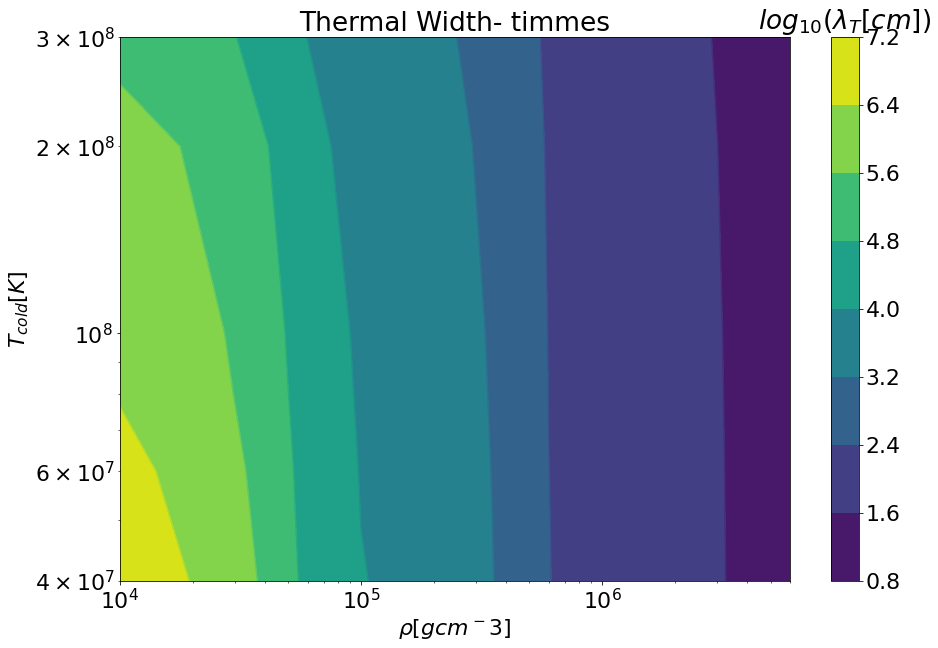

In [36]:
fig, ax = plt.subplots()

ax.contour(R,T,W)
fill=ax.contourf(R,T,W)
cbar = fig.colorbar(fill)
cbar.ax.set_title(r'$log_{10}(\lambda_T [cm])$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Thermal Width- {}".format(width_type))
ax.set_xlabel(r'$\rho [g cm^-3] $')
ax.set_ylabel(r'$T_{cold} [K] $')
plt.show()
#print(flag.lambda_t/flag.tau_diffusion()/2.9979e10)

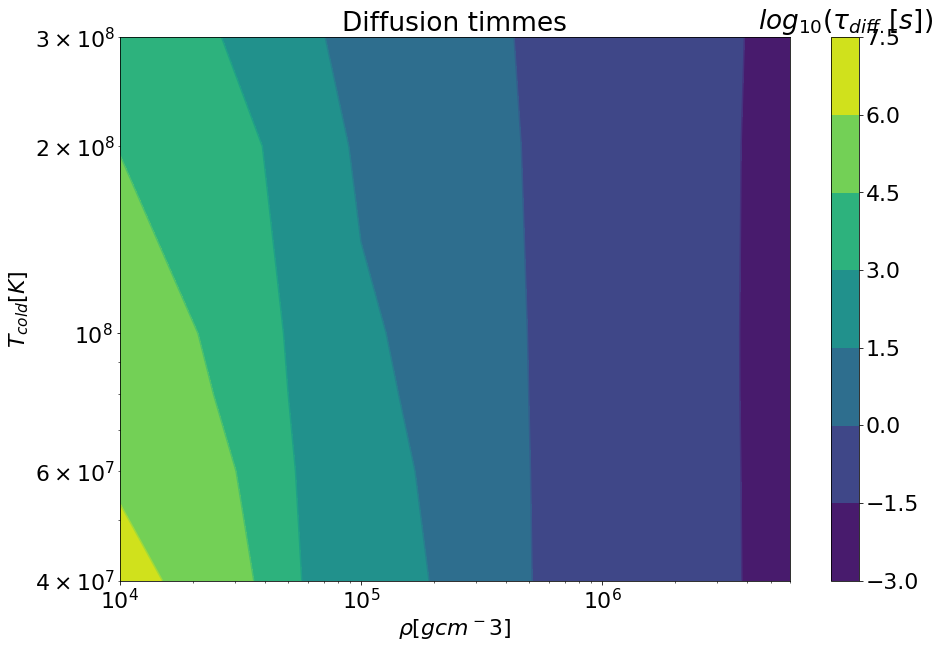

In [44]:
fig, ax = plt.subplots()

ax.contour(R,T,Tau)
fill=ax.contourf(R,T,Tau)
cbar = fig.colorbar(fill)
cbar.ax.set_title(r'$log_{10}(\tau_{diff.} [s])$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Diffusion- {}".format(width_type))
ax.set_xlabel(r'$\rho [g\ cm^{-3}] $')
ax.set_ylabel(r'$T_{cold} [K] $')
plt.show()


The plot below is some characteristic diffussion speed which itself isn't physical, but can be directly compared to the speed of DM. This is because 
$$
 \tau_{cross.} \equiv \lambda_T/ v_{DM} 
$$
In order for DM to heat the region in the "fast" approximation, we must have 
$$
\tau_{cross.} \ll \tau_{diff.}
$$
Or rewritten is 
$$
v_{DM} \gg \lambda_T/\tau_{diff.} \equiv v_{diff.}
$$



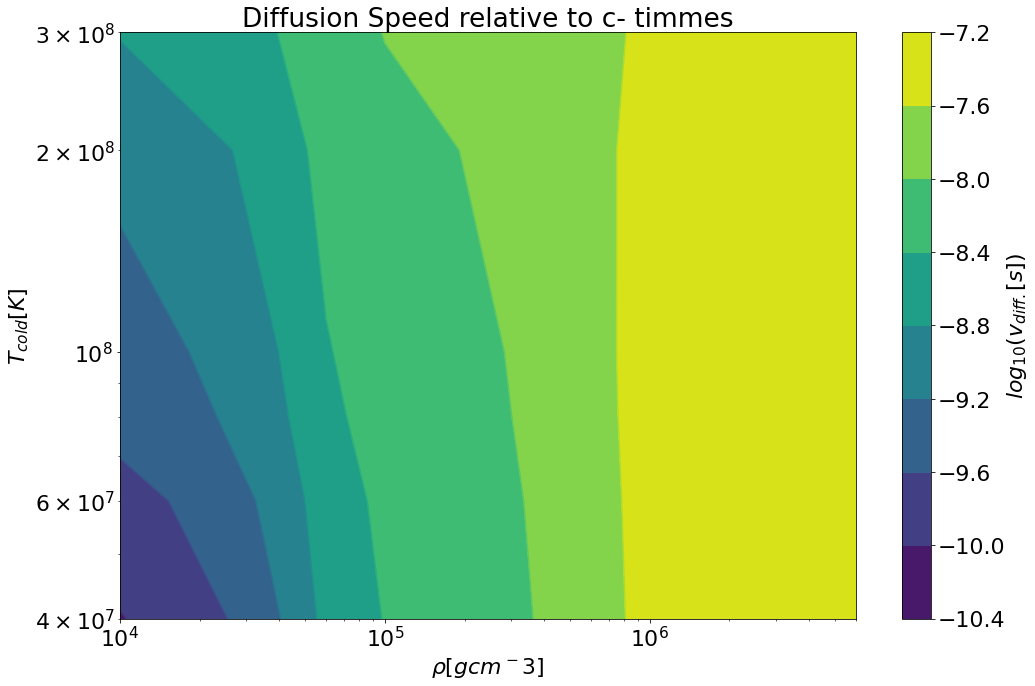

In [52]:
fig, ax = plt.subplots()

c = 2.9979e10
ax.contour(R,T,W-Tau-np.log10(c))
fill=ax.contourf(R,T,W-Tau-np.log10(c) )
cbar = fig.colorbar(fill)
cbar.set_label(r'$log_{10}(v_{diff.} [s])$',labelpad=-1)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Diffusion Speed relative to c- {}".format(width_type))
ax.set_xlabel(r'$\rho [g cm^-3] $')
ax.set_ylabel(r'$T_{cold} [K] $')
plt.tight_layout()
plt.show()
